<a href="https://colab.research.google.com/github/josh-shah/josh-shah.github.io/blob/main/Supervised_FPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [ ]:
#Get 21/22 data
url_2021 = '/content/21_22_cleaned_players.csv'

In [ ]:
df_key_stats_2021 = pd.read_csv(url_2021)
df_key_stats_2021.keys()

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

In [ ]:
# Fix the column headers
df_key_stats_2021.columns = ["First_Name","Surname", "Goals","Assists", "Total_Points", "Minutes", "Goals_Conceded","Creativity", "Influence","Threat", "Bonus_Points","BPS", "ICT_Index", "Clean_Sheets", "Red_Cards", "Yellow_Cards", "Selected_By_Percent","Now_cost","Position"]
df_key_stats_2021

,First_Name,Surname,Goals,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus_Points,BPS,ICT_Index,Clean_Sheets,Red_Cards,Yellow_Cards,Selected_By_Percent,Now_cost,Position
0,Bernd,Leno,0,0,10,360,9,0.0,85.0,0.0,0,69,8.5,1,0,0,0.8,45,GK
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.5,40,GK
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,63,MID
3,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,1.2,96,FWD
4,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3,0.4,42,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Bruno André,Cavaco Jordão,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45,MID
733,Toti António,Gomes,0,0,6,360,6,4.3,59.6,28.0,0,52,9.2,0,0,1,0.0,44,DEF
734,Dion,Sanderson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,DEF
735,Ryan,Giles,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45,MID


In [ ]:
# Pick the features we want
df_key_stats_2021 = df_key_stats_2021[["Position","First_Name","Surname", "Goals","Assists", "Total_Points", "Minutes", "Goals_Conceded","Creativity", "Influence","Threat", "Bonus_Points","BPS", "ICT_Index", "Clean_Sheets", "Red_Cards", "Yellow_Cards", "Selected_By_Percent","Now_cost"]]
df_key_stats_2021 = df_key_stats_2021.iloc[1:]
df_key_stats_2021

,Position,First_Name,Surname,Goals,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus_Points,BPS,ICT_Index,Clean_Sheets,Red_Cards,Yellow_Cards,Selected_By_Percent,Now_cost
1,GK,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.5,40
2,MID,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,63
3,FWD,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,1.2,96
4,DEF,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3,0.4,42
5,FWD,Alexandre,Lacazette,4,8,90,1773,17,385.7,376.6,724.0,3,295,148.3,10,0,0,3.1,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MID,Bruno André,Cavaco Jordão,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45
733,DEF,Toti António,Gomes,0,0,6,360,6,4.3,59.6,28.0,0,52,9.2,0,0,1,0.0,44
734,DEF,Dion,Sanderson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40
735,MID,Ryan,Giles,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45


In [ ]:
print(df_key_stats_2021.shape) #736 rows and 19 columns

(736, 19)


In [ ]:
df_key_stats_2021.isnull().values.any()

False

In [ ]:
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'Position': dtype('O'), 'First_Name': dtype('O'), 'Surname': dtype('O'), 'Goals': dtype('int64'), 'Assists': dtype('int64'), 'Total_Points': dtype('int64'), 'Minutes': dtype('int64'), 'Goals_Conceded': dtype('int64'), 'Creativity': dtype('float64'), 'Influence': dtype('float64'), 'Threat': dtype('float64'), 'Bonus_Points': dtype('int64'), 'BPS': dtype('int64'), 'ICT_Index': dtype('float64'), 'Clean_Sheets': dtype('int64'), 'Red_Cards': dtype('int64'), 'Yellow_Cards': dtype('int64'), 'Selected_By_Percent': dtype('float64'), 'Now_cost': dtype('int64')}


In [ ]:
print(df_key_stats_2021.describe()) # statistical overview of the data

            Goals     Assists  Total_Points      Minutes  Goals_Conceded  \
count  736.000000  736.000000    736.000000   736.000000      736.000000   
mean     1.408967    1.262228     42.668478  1017.809783       15.994565   
std      2.928606    2.209562     49.220110  1069.612032       17.585553   
min      0.000000    0.000000     -1.000000     0.000000        0.000000   
25%      0.000000    0.000000      0.000000     0.000000        0.000000   
50%      0.000000    0.000000     24.000000   696.000000       10.000000   
75%      1.000000    2.000000     74.250000  1862.250000       27.000000   
max     23.000000   17.000000    265.000000  3420.000000       79.000000   

        Creativity    Influence       Threat  Bonus_Points         BPS  \
count   736.000000   736.000000   736.000000    736.000000  736.000000   
mean    145.461277   219.295652   170.296196      3.315217  185.997283   
std     215.680363   253.070646   275.514266      5.320589  209.264439   
min       0.000000 

In [ ]:
print(df_key_stats_2021.groupby('Position').size()) # the output variable 

Position
DEF    247
FWD     98
GK      82
MID    309
dtype: int64


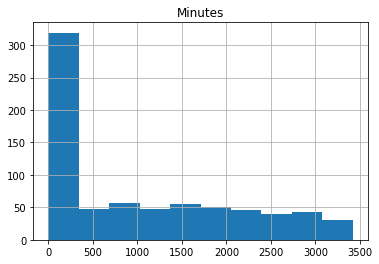

In [ ]:
# Notice how many players barely play or don't play at all
df_key_stats_2021[["Minutes"]].hist()
plt.show()


In [ ]:
# weed out players who do not play even 600 minutes
df_key_stats_2021.sort_values('Minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2021
count = 0
for index, row in df_key_stats_2021.iterrows():
    if(row["Minutes"] < 600):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2021 = df_key_stats_2021[358:]

358


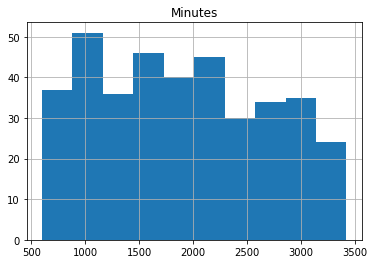

In [ ]:
# better data to work with
df_key_stats_2021[["Minutes"]].hist()
plt.show()

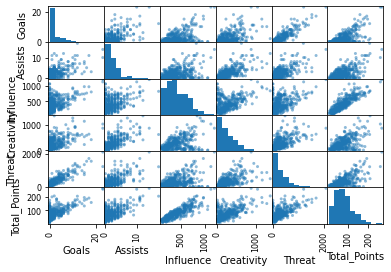

In [ ]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2021[["Goals","Assists","Influence","Creativity","Threat","Total_Points"]])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# split-out validation dataset (testing data)
array = df_key_stats_2021.values
X = array[:,4:] # row, columns of the features that I want
y = array[:,0] # output variable: player position
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size = 0.2, random_state = 1) # random state means seed

In [ ]:
# Algorithms
all_models = []
# liblinear has both L1 and L2 regularization
#     - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg",LogisticRegression(solver = "liblinear", multi_class="ovr")))

# maximizes seperation using our chosen features
#     - maximizing distance between means and minimizing variance 
#     - reduces features down 
#     - minimizes the scatter
all_models.append(("LDA",LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#     - new data is classified by observing the "nearest neighbours"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
all_models.append(("CART",DecisionTreeClassifier()))

# uses the Gaussian distribution to classify new data
all_models.append(("NB",GaussianNB()))

# uses a threshold that is the midpoint between different classifications
all_models.append(("SVM-g",SVC(gamma = "auto")))

# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#     - kind of like foiling through the n_splits and training and testing for each algorithm
for name, model in all_models:
  kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring = "accuracy") # evaluate score using cross validation
  results.append(cv_results)
  names.append(name)
  print("%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())) # take the mean and standard deviation

LogReg:0.821505(0.094871)
LDA:0.798495(0.077533)
KNN:0.626667(0.100038)
CART:0.685806(0.066434)
NB:0.603118(0.069432)
SVM-g:0.407204(0.011581)


In [ ]:
# best model - Logistic Regression
model = LogisticRegression(solver = "liblinear", multi_class="ovr",random_state = 1) 
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8552631578947368
[[19  0  0  4]
 [ 0  7  0  1]
 [ 0  0  7  0]
 [ 6  0  0 32]]
              precision    recall  f1-score   support

         DEF       0.76      0.83      0.79        23
         FWD       1.00      0.88      0.93         8
          GK       1.00      1.00      1.00         7
         MID       0.86      0.84      0.85        38

    accuracy                           0.86        76
   macro avg       0.91      0.89      0.89        76
weighted avg       0.86      0.86      0.86        76



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[ 3.72396475e-02 -1.26196679e-01 -5.80803592e-04 -2.90295595e-02
 -9.44995019e-02 -1.12376481e-01 -8.54340609e-02  1.53994985e-01
  6.00538960e-02  8.96848214e-01 -2.77245824e-01  6.97050648e-01
  1.58727192e-01  1.65118390e-02 -5.89156821e-02]
Index(['Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity',
       'Influence', 'Threat', 'Bonus_Points', 'BPS', 'ICT_Index',
       'Clean_Sheets', 'Red_Cards', 'Yellow_Cards', 'Selected_By_Percent',
       'Now_cost'],
      dtype='object')
Feature: 0, Score: 0.03724
Feature: 1, Score: -0.12620
Feature: 2, Score: -0.00058
Feature: 3, Score: -0.02903
Feature: 4, Score: -0.09450
Feature: 5, Score: -0.11238
Feature: 6, Score: -0.08543
Feature: 7, Score: 0.15

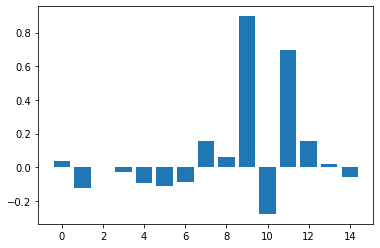

In [ ]:
importance=model.coef_[0] # Coefficient of the features
print(model.get_params())
print(importance)
print(df_key_stats_2021.columns[4:])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Get 2022 to 2023 data and use this model to predict their positions
url_2023 = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url_2023)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

In [ ]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [ ]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_key_stats_2022 = df_elements[['team','first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type']]
df_key_stats_2022['position'] = df_key_stats_2022.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_key_stats_2022['team'] = df_key_stats_2022.team.map(df_teams.set_index('id').name) # team of player
df_key_stats_2022['now_cost'] = df_key_stats_2022['now_cost'].map(lambda x: x/10) # cost of player
df_key_stats_2022['value'] = df_key_stats_2022.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
def change_name(x):
    if(x == "Midfielder"):
        return "MID"
    elif(x == "Forward"):
        return "FWD"
    elif(x == "Goalkeeper"):
        return "GK"
    else:
        return "DEF"
        
df_key_stats_2022["position"] = [change_name(x) for x in df_key_stats_2022["position"]]
df_key_stats_2022

,team,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,position,value
0,Arsenal,Cédric,Alves Soares,0,0,2,28,0,1.6,2.4,...,5,0.4,0,0,0,0.1,4.2,2,DEF,0.48
1,Arsenal,Granit,Xhaka,3,4,71,1436,14,360.2,346.6,...,294,99.3,7,0,3,3.3,5.1,3,MID,13.92
2,Arsenal,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,...,27,1.1,0,0,0,0.8,4.2,3,MID,1.43
3,Arsenal,Rob,Holding,0,0,5,15,0,0.1,3.4,...,17,0.3,0,0,0,0.1,4.2,2,DEF,1.19
4,Arsenal,Thomas,Partey,2,0,48,1212,8,186.3,257.8,...,224,59.3,8,0,2,0.5,4.8,3,MID,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Wolves,Boubacar,Traoré,0,1,12,380,7,16.6,48.0,...,38,7.2,0,0,2,0.1,4.4,3,MID,2.73
683,Wolves,Nathan,Fraser,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0,0.1,4.5,4,FWD,0.00
684,Wolves,Harvey,Griffiths,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0,0.0,4.5,3,MID,0.00
685,Wolves,Dexter,Lembikisa,0,0,1,22,1,0.8,1.4,...,3,0.2,0,0,0,0.0,4.0,2,DEF,0.25


In [ ]:
df_key_stats_2022 = df_key_stats_2022[['position', 'first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost']]
df_key_stats_2022

,position,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,DEF,Cédric,Alves Soares,0,0,2,28,0,1.6,2.4,0.0,0,5,0.4,0,0,0,0.1,4.2
1,MID,Granit,Xhaka,3,4,71,1436,14,360.2,346.6,286.0,7,294,99.3,7,0,3,3.3,5.1
2,MID,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.8,4.2
3,DEF,Rob,Holding,0,0,5,15,0,0.1,3.4,0.0,0,17,0.3,0,0,0,0.1,4.2
4,MID,Thomas,Partey,2,0,48,1212,8,186.3,257.8,148.0,4,224,59.3,8,0,2,0.5,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,MID,Boubacar,Traoré,0,1,12,380,7,16.6,48.0,7.0,0,38,7.2,0,0,2,0.1,4.4
683,FWD,Nathan,Fraser,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,4.5
684,MID,Harvey,Griffiths,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.5
685,DEF,Dexter,Lembikisa,0,0,1,22,1,0.8,1.4,0.0,0,3,0.2,0,0,0,0.0,4.0


In [ ]:
df_key_stats_2022.sort_values('minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2022 = df_key_stats_2022.reset_index(drop=True)
df_key_stats_2022

,position,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,FWD,Matheus,Santos Carneiro Da Cunha,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,5.5
1,MID,Taylor,Richards,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.5
2,DEF,Haydon,Roberts,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.0
3,DEF,Ben,Davies,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.0
4,DEF,Rhys,Williams,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,DEF,Tim,Ream,1,0,56,1617,27,19.0,357.6,68.0,7,328,44.7,5,0,1,1.7,4.5
683,GK,Danny,Ward,0,0,66,1620,31,0.0,430.4,0.0,9,344,43.0,6,0,0,31.2,4.1
684,GK,David,Raya Martin,0,0,76,1620,28,10.1,574.8,0.0,9,398,58.6,5,0,0,7.1,4.6
685,GK,Nick,Pope,0,0,92,1620,11,0.0,370.8,0.0,9,381,37.0,10,0,2,21.5,5.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f419fd72400>]],
      dtype=object)

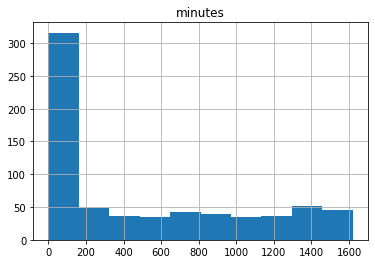

In [ ]:
df_key_stats_2022[["minutes"]].hist()

In [ ]:
# remove players who have less than 300 minutes of playing time
count = 0
for index, row in df_key_stats_2022.iterrows():
    if(row["minutes"] < 300):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2022 = df_key_stats_2022[360:]
df_key_stats_2022 = df_key_stats_2022.reset_index(drop=True)

360


In [ ]:
dataTypeDict = dict(df_key_stats_2022.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_conceded': dtype('int64'), 'creativity': dtype('O'), 'influence': dtype('O'), 'threat': dtype('O'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'ict_index': dtype('O'), 'clean_sheets': dtype('int64'), 'red_cards': dtype('int64'), 'yellow_cards': dtype('int64'), 'selected_by_percent': dtype('O'), 'now_cost': dtype('float64')}


In [ ]:
df_key_stats_2022[["influence","creativity","threat"]] = df_key_stats_2022[["influence","creativity","threat"]].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [ ]:
df_key_stats_2022
dataTypeDict = dict(df_key_stats_2022.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_conceded': dtype('int64'), 'creativity': dtype('float64'), 'influence': dtype('float64'), 'threat': dtype('float64'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'ict_index': dtype('O'), 'clean_sheets': dtype('int64'), 'red_cards': dtype('int64'), 'yellow_cards': dtype('int64'), 'selected_by_percent': dtype('O'), 'now_cost': dtype('float64')}


Text(0, 0.5, 'count')

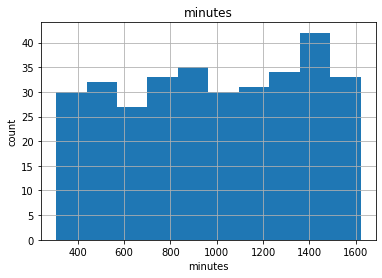

In [ ]:
df_key_stats_2022[["minutes"]].hist()
plt.xlabel("minutes")
plt.ylabel("count")

In [ ]:
print(df_key_stats_2022.shape) # 327 rows and 15 columns

(327, 19)


In [ ]:
df_key_stats_2022.isnull().values.any()

False

In [ ]:
print(df_key_stats_2022.describe()) # statistical overview of the data

       goals_scored     assists  total_points      minutes  goals_conceded  \
count    327.000000  327.000000    327.000000   327.000000      327.000000   
mean       1.388379    1.223242     41.623853   993.859327       15.623853   
std        2.315377    1.569165     22.048937   382.387734        7.470337   
min        0.000000    0.000000      4.000000   308.000000        1.000000   
25%        0.000000    0.000000     25.000000   678.500000        9.000000   
50%        1.000000    1.000000     38.000000   991.000000       15.000000   
75%        2.000000    2.000000     55.000000  1337.500000       21.000000   
max       21.000000   10.000000    142.000000  1620.000000       38.000000   

       creativity   influence       threat       bonus         bps  \
count  327.000000  327.000000   327.000000  327.000000  327.000000   
mean   143.759327  216.391437   165.544343    3.305810  180.131498   
std    135.744329  121.959366   179.944275    3.719217   90.252158   
min      0.000000

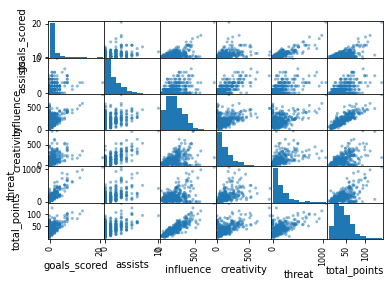

In [ ]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2022[["goals_scored","assists","influence","creativity","threat","total_points"]])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
array = df_key_stats_2022.values
new_input_X = array[:,4:]
print(new_input_X)
true = array[:,0] # true position of the player
predictions = model.predict(new_input_X)
print(new_input_X)
print(new_input_X, predictions)

[[0 11 308 ... 1 '0.1' 5.2]
 [0 13 311 ... 0 '0.0' 4.7]
 [1 13 313 ... 2 '0.2' 5.0]
 ...
 [0 76 1620 ... 0 '7.1' 4.6]
 [0 92 1620 ... 2 '21.5' 5.3]
 [0 45 1620 ... 3 '1.4' 4.4]]
[[0 11 308 ... 1 '0.1' 5.2]
 [0 13 311 ... 0 '0.0' 4.7]
 [1 13 313 ... 2 '0.2' 5.0]
 ...
 [0 76 1620 ... 0 '7.1' 4.6]
 [0 92 1620 ... 2 '21.5' 5.3]
 [0 45 1620 ... 3 '1.4' 4.4]]
[[0 11 308 ... 1 '0.1' 5.2]
 [0 13 311 ... 0 '0.0' 4.7]
 [1 13 313 ... 2 '0.2' 5.0]
 ...
 [0 76 1620 ... 0 '7.1' 4.6]
 [0 92 1620 ... 2 '21.5' 5.3]
 [0 45 1620 ... 3 '1.4' 4.4]] ['DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF'
 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF'
 'FWD' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF'
 'DEF' 'DEF' 'MID' 'DEF' 'DEF' 'FWD' 'DEF' 'DEF' 'DEF' 'DEF' 'MID' 'DEF'
 'DEF' 'FWD' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF' 'DEF'
 'DEF' 'DEF' 'MID' 'DEF' 'FWD' 'DEF' 'MID' 'DEF' 'DEF' 'DEF' 'DEF' 'MID'
 'DEF' 'DEF' 'DEF' 'DEF' 'DE

In [ ]:
print(accuracy_score(true, predictions))
print(confusion_matrix(true, predictions))
print(classification_report(true, predictions))

0.6483180428134556
[[123   0   0   1]
 [ 17  19   0   2]
 [  0   0  22   0]
 [ 93   2   0  48]]
              precision    recall  f1-score   support

         DEF       0.53      0.99      0.69       124
         FWD       0.90      0.50      0.64        38
          GK       1.00      1.00      1.00        22
         MID       0.94      0.34      0.49       143

    accuracy                           0.65       327
   macro avg       0.84      0.71      0.71       327
weighted avg       0.78      0.65      0.62       327



In [ ]:
df_key_stats_2022["predicted"] = predictions
df_key_stats_2022 = df_key_stats_2022[["predicted","position","first_name","second_name","now_cost","total_points","minutes","goals_scored","assists","clean_sheets","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2022 = df_key_stats_2022.sort_values('total_points', inplace=False, ascending=False)
df_key_stats_2022.head(50)

,predicted,position,first_name,second_name,now_cost,total_points,minutes,goals_scored,assists,clean_sheets,yellow_cards,red_cards,bonus,influence,creativity,threat
215,DEF,FWD,Erling,Haaland,12.2,142,1216,21,3,5,3,0,23,782.6,189.6,1067.0
316,DEF,DEF,Kieran,Trippier,6.0,124,1594,1,5,12,4,0,25,474.2,825.8,73.0
311,FWD,FWD,Harry,Kane,11.6,112,1561,13,3,5,4,0,22,588.0,350.3,986.0
293,DEF,MID,Miguel,Almirón Rejala,5.9,106,1487,9,2,11,1,0,9,445.4,240.1,623.0
247,DEF,MID,Martin,Ødegaard,6.6,103,1342,7,5,7,3,0,17,456.6,523.6,503.0
273,FWD,FWD,Ivan,Toney,7.4,100,1440,12,3,5,6,0,17,543.8,249.2,737.0
278,DEF,MID,Gabriel,Martinelli Silva,6.8,98,1450,7,5,8,1,0,7,409.6,380.2,729.0
299,FWD,MID,Mohamed,Salah,12.9,98,1507,7,5,4,0,0,10,418.2,451.7,848.0
277,MID,MID,Bukayo,Saka,8.1,94,1444,6,7,7,4,0,7,449.4,538.2,505.0
233,DEF,MID,Kevin,De Bruyne,12.5,93,1310,3,10,5,1,0,13,480.8,838.1,410.0


In [ ]:
#save as csv
df_key_stats_2022.to_csv('Supervised_FPL.csv')